In [206]:
import nltk
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from string import digits
 # -*- coding: gbk -*-
import sys
from imp import reload
reload(sys)
import os
import os.path
import time

In [207]:
import pandas as pd
import numpy as np
import codecs
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from apyori import apriori

## 1.What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice

Because the source folder only contains txt files,so txt file content is the only variable we use in text mining analysis.  
During analysis,we will use frequency,terms as variables to analyse.

In [208]:
filePaths=[]
fileContents=[]
for root,dirs,files in os.walk('txt/text-files-to-mine/'):
    for name in files:
        filePath=os.path.join(root,name)
        filePaths.append(filePath)
        f=codecs.open(filePath,'r','utf-8')
        fileContent=f.read()
        f.close()
        fileContents.append(fileContent)

import pandas
df=pandas.DataFrame({
    'fileContent':fileContents
})
rs = 42

In [209]:
df

,fileContent
0,Claxton hunting first major medal\n\nBritish h...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...
2,Greene sets sights on world title\n\nMaurice G...
3,IAAF launches fight against drugs\n\nThe IAAF ...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'..."
5,Isinbayeva claims new world best\n\nPole vault...
6,O'Sullivan commits to Dublin race\n\nSonia O'S...
7,Hansen 'delays return until 2006'\n\nBritish t...
8,Off-colour Gardener storms to win\n\nBritain's...
9,Collins to compete in Birmingham\n\nWorld and ...


## 2.Can you identify data quality issues in order to perform text mining

There are 200 different txt files inside the source folder,so firstly we need to put all the txt file inside dataframe for further analysis,then i found that this txt files contains lots of unnecessary characters like digits,sapce and punctuation,so we remove all this useless charater and make all the other characters low case for analysing.
Secondly,too manys stopwords need to be deleted like 'he','she' and 'it' to improve accuracy.
Finally lemmatizer is used to make the words to their basic format.

In [210]:

# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

# join provided stopwords with the default NLTK English stopwords
stopwords = set(sw.words('english'))
def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

In [211]:
def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            remove_digits = str.maketrans('', '', digits)
            token = token.translate(remove_digits)
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')
            

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(df['fileContent'])

# see the number of unique tokens produced by the vectorizer. Lots of them...
print(len(tfidf_vec.get_feature_names()))

34819


In [213]:
from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=7, random_state=rs).fit(X)

In [214]:
# function to visualise text cluster. Useful for the assignment too :)

def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :5]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster 0: cricket, sri, icc, sri lanka, lanka, 
Top terms for cluster 1: club, want, liverpool, £, say, 
Top terms for cluster 2: pakistan, wicket, test, ball, australia, 
Top terms for cluster 3: athens, olympic, world, year, open, 
Top terms for cluster 4: england, ireland, wale, scotland, nation, 
Top terms for cluster 5: say, play, game, win, player, 
Top terms for cluster 6: cross country, chepkemei, country, cross, marathon, 


The output above shows the terms characterising each cluster.Unfortunately, this clustering solution does not give good grouping.Too many repeated items appeared in a same cluster like 'sri' and 'sir lanka'.Also there are some meaning less high tf value like 'say' and 'year',we also need to fliter this words in the next few steps.

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(df['fileContent'])
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(df)

In [216]:
terms

[{'term': 'claxton', 'idx': 5251, 'tf': 7, 'df': 1},
 {'term': 'hunt', 'idx': 14488, 'tf': 2, 'df': 2},
 {'term': 'first', 'idx': 10793, 'tf': 185, 'df': 89},
 {'term': 'major', 'idx': 18027, 'tf': 24, 'df': 19},
 {'term': 'medal', 'idx': 18848, 'tf': 28, 'df': 14},
 {'term': 'british', 'idx': 3931, 'tf': 30, 'df': 20},
 {'term': 'hurdler', 'idx': 14497, 'tf': 2, 'df': 2},
 {'term': 'sarah', 'idx': 25817, 'tf': 1, 'df': 1},
 {'term': 'confident', 'idx': 6034, 'tf': 14, 'df': 12},
 {'term': 'win', 'idx': 33779, 'tf': 246, 'df': 102},
 {'term': 'next', 'idx': 20334, 'tf': 86, 'df': 59},
 {'term': 'month', 'idx': 19504, 'tf': 65, 'df': 52},
 {'term': 'european', 'idx': 9433, 'tf': 38, 'df': 26},
 {'term': 'indoor', 'idx': 14853, 'tf': 33, 'df': 15},
 {'term': 'championship', 'idx': 4769, 'tf': 40, 'df': 31},
 {'term': 'madrid', 'idx': 17943, 'tf': 36, 'df': 18},
 {'term': 'year', 'idx': 34472, 'tf': 308, 'df': 134},
 {'term': 'old', 'idx': 20783, 'tf': 88, 'df': 74},
 {'term': 'already', 

 --- Least Useful Terms --- 
Frequency descending :
say Term Frequency 447    Document Frequency 168
year Term Frequency 308    Document Frequency 134
game Term Frequency 249    Document Frequency 106
win Term Frequency 246    Document Frequency 102
play Term Frequency 240    Document Frequency 104
one Term Frequency 204    Document Frequency 104
go Term Frequency 203    Document Frequency 112
take Term Frequency 202    Document Frequency 112
england Term Frequency 199    Document Frequency 52
two Term Frequency 197    Document Frequency 103
------------------
Frequency Ascending :
mate mine Term Frequency 1    Document Frequency 1
mine shaun Term Frequency 1    Document Frequency 1
shaun threat Term Frequency 1    Document Frequency 1
threat play Term Frequency 1    Document Frequency 1
position also Term Frequency 1    Document Frequency 1
also play Term Frequency 1    Document Frequency 1
position believe Term Frequency 1    Document Frequency 1
still england Term Frequency 1    Doc

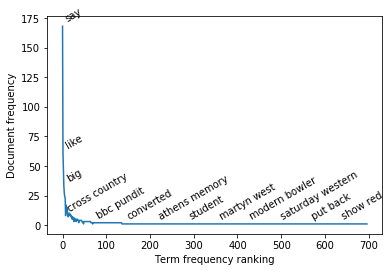

In [217]:
# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    print(" --- Least Useful Terms --- ")
    print("Frequency descending :")
    for term in terms[0:10]:
        print(term['term'],  "Term Frequency" ,term['tf'] ,"   Document Frequency", term['df'])
    print("------------------")
    print("Frequency Ascending :")
    leng = len(terms) - 1
    for term in terms[(leng - 10):leng]:
        print(term['term'], "Term Frequency" ,term['tf'] ,"   Document Frequency", term['df'])
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
    
visualise_zipf(terms)

## 3.Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose. 


So we can find 10 least useful items from both the high end terms and low end terms.
#### Frequency descending :
* say  168 
* year  134 
* game   106 
* win  102 
* play  104 
#### Frequency Ascending : 
* mate mine  1 
* mine shaun  1 
* shaun threat  1 
* threat play  1 
* position also  1 

## 4.Did you disregard any frequent terms in addition to items automatically selected by the Filter tool?

In [218]:
#method to count term weighting 
import math
def weight(tf,df):
    return tf*math.log(6/df,10)

In [223]:
dfFre = [0]*200
for i, term in enumerate(terms):
    if i < 20:
        print(str(i + 1) + "\tTerm:", term['term'], "\tTerm weighting:", 
              (term['tf']*math.log(200/term['df'],10)), "\tTerm Frequency", term['tf'],"\tDocument Frequency", term['df']/200)
    dfFre[term['df'] - 1] += 1

1	Term: say 	Term weighting: 33.847159130338895 	Term Frequency 447 	Document Frequency 0.84
2	Term: year 	Term weighting: 53.56896076814546 	Term Frequency 308 	Document Frequency 0.67
3	Term: game 	Term weighting: 68.65530846940351 	Term Frequency 249 	Document Frequency 0.53
4	Term: win 	Term weighting: 71.93773667990764 	Term Frequency 246 	Document Frequency 0.51
5	Term: play 	Term weighting: 68.1591975276482 	Term Frequency 240 	Document Frequency 0.52
6	Term: one 	Term weighting: 57.93531789850097 	Term Frequency 204 	Document Frequency 0.52
7	Term: go 	Term weighting: 51.11783051774132 	Term Frequency 203 	Document Frequency 0.56
8	Term: take 	Term weighting: 50.86601854474752 	Term Frequency 202 	Document Frequency 0.56
9	Term: england 	Term weighting: 116.42030375380722 	Term Frequency 199 	Document Frequency 0.26
10	Term: two 	Term weighting: 56.773975878885366 	Term Frequency 197 	Document Frequency 0.515
11	Term: time 	Term weighting: 45.42277735365983 	Term Frequency 189 

The previous ranking shows the 20 most frequent terms, also i input weight of these terms,and we can find most of them are under 70,only half of them are larger than 60 and 'england' is outstanding which is 116,so we decide to disregard all the frequent terms which term weighting is less than 60.

## 5. Justify the term weighting option selected.


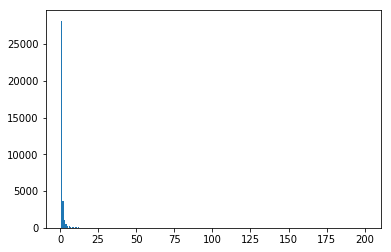

In [172]:
plt.bar(range(1, len(dfFre) + 1), dfFre)
plt.show()

  &nbsp;&nbsp;We are going to filter those terms which weighting are less than 60,which menas the maximum document frequency will be 0.46.So we set the max_df to 0.46 and it will eliminate those terms which are disregarded by us.  
  &nbsp;&nbsp;From bar graph below we can clearly find the that there are more than 25000 terms which only appeared in one document,so it is impossile to delete all these items for accuracy.So we set the minimum document frequency to 1.  
   &nbsp;&nbsp;We will also set min_df to 2 because there are still more than 6000 terms, so we can compare the results .However there is no need to set the min_df to 3,because the number of terms are too small to analyse.

In [173]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=1, max_df=0.46)
X_filter = filter_vec.fit_transform(df['fileContent'])

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec.get_feature_names()))

34806


In [174]:
%%time
# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters=7, random_state=rs).fit(X_filter)

Wall time: 4.52 s


In [175]:
print('Min_df = 1:')
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, filter_vec.get_feature_names())


Min_df = 1:
Top terms for cluster 0: test, wicket, ball, cricket, pakistan, 
Top terms for cluster 1: williams, wale, get, half, injury, 
Top terms for cluster 2: england, ireland, kick, goal, referee, 
Top terms for cluster 3: race, athens, world, athletics, marathon, 
Top terms for cluster 4: open, roddick, australian, australian open, moya, 
Top terms for cluster 5: club, player, cup, team, season, 
Top terms for cluster 6: liverpool, real, benitez, chelsea, madrid, 


In [176]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec2 = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.46)
X_filter2 = filter_vec2.fit_transform(df['fileContent'])

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec2.get_feature_names()))

6630


In [177]:
%%time
# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters=7, random_state=rs).fit(X_filter2)

Wall time: 1.9 s


In [178]:
print('Min_df = 2:')
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, filter_vec2.get_feature_names())

Min_df = 2:
Top terms for cluster 0: england, cricket, ball, south, test, 
Top terms for cluster 1: moya, beat, davis, davis cup, agassi, 
Top terms for cluster 2: open, williams, grand slam, australian, slam, 
Top terms for cluster 3: club, player, want, chelsea, manager, 
Top terms for cluster 4: world, race, indoor, olympic, athletics, 
Top terms for cluster 5: drug, ban, greek, iaaf, test, 
Top terms for cluster 6: roddick, hewitt, shot, set, break, 


## 6. What is the number of input features available to execute clustering? (Hint: how the original text data is converted into a feature set that can be mined for knowledge discovery?)

From the previous research,we can find that there are 34806 input features available to execute clustering when the min_df = 1,there are 6630 input feature available when the min_df = 2,so we cluster these two sets sepatately to figure out which one is significantly better.  
Then Singular value decomposition (SVD) is used to reduce the number of terms while preserving the similarity structure among documents

In [188]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_trans = svd.fit_transform(X_filter)

In [189]:
# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms = filter_vec.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms[i], end=", ")
    print()

Top terms in component #0 england, open, world, first, get, 
Top terms in component #1 open, roddick, australian open, moya, australian, 
Top terms in component #2 wicket, open, australia, pakistan, inning, 
Top terms in component #3 world, athens, test, chepkemei, athletics, 
Top terms in component #4 roddick, moya, spain, davis cup, davis, 
Top terms in component #5 ferguson, chelsea, club, arsenal, liverpool, 
Top terms in component #6 idowu, edward, jump, indoor, triple, 
Top terms in component #7 club, kafer, saracen, season, steve, 
Top terms in component #8 idowu, edward, triple, jump, aragones, 
Top terms in component #9 aragones, spain, racism, henry, comment, 


In [190]:
%%time
# K-means clustering using LSA-transformed X
svd_kmeans = KMeans(n_clusters=7, random_state=rs).fit(X_trans)

Wall time: 91.8 ms


In [191]:
# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans.n_clusters, original_space_centroids, filter_vec.get_feature_names())

Top terms for cluster 0: cricket, test, england, day, arsenal, 
Top terms for cluster 1: clijsters, wrist, open, entry, dokic, 
Top terms for cluster 2: cross country, chepkemei, marathon, country, cross, 
Top terms for cluster 3: liverpool, club, real, want, beckham, 
Top terms for cluster 4: open, world, australian, australian open, champion, 
Top terms for cluster 5: england, wale, ireland, nation, six nation, 
Top terms for cluster 6: roddick, moya, nadal, davis, davis cup, 


### When min_df = 2 :

In [192]:
X_trans2 = svd.fit_transform(X_filter2)

In [193]:
# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms2 = filter_vec2.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms2[i], end=", ")
    print()

Top terms in component #0 england, open, world, get, player, 
Top terms in component #1 open, roddick, australian, australian open, moya, 
Top terms in component #2 athens, athletics, race, marathon, chepkemei, 
Top terms in component #3 test, wicket, pakistan, ball, run, 
Top terms in component #4 ireland, wale, england, nation, six nation, 
Top terms in component #5 greek, drug, kenteris, iaaf, thanou, 
Top terms in component #6 arsenal, chelsea, henry, shot, ferguson, 
Top terms in component #7 roddick, moya, davis, davis cup, spain, 
Top terms in component #8 chepkemei, marathon, cross country, radcliffe, cross, 
Top terms in component #9 pakistan, moya, australia, cup, davis cup, 


In [194]:
%%time
svd_kmeans2 = KMeans(n_clusters=7, random_state=rs).fit(X_trans2)

Wall time: 114 ms


In [196]:
# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans2.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans2.n_clusters, original_space_centroids, filter_vec2.get_feature_names())

Top terms for cluster 0: arsenal, chelsea, henry, wenger, mourinho, 
Top terms for cluster 1: drug, collins, balco, ban, pound, 
Top terms for cluster 2: ball, wicket, vaughan, run, strauss, 
Top terms for cluster 3: cricket, team, world, new, athletics, 
Top terms for cluster 4: england, wale, nation, six nation, six, 
Top terms for cluster 5: open, roddick, australian, australian open, hewitt, 
Top terms for cluster 6: liverpool, club, £, want, souness, 


## 7. State how many clusters are generated? Name each cluster meaningfully according to the terms that appear in the clusters?

From the two previous outcome,we can find the result which min_df = 1 is significantly better than the result when min_df = 2,So we choose the first as our final result. 

Therea are 7 clusters finally

* Top terms for cluster 0: cricket, test, england, day, arsenal,
* Top terms for cluster 1: clijsters, wrist, open, entry, dokic, 
* Top terms for cluster 2: cross country, chepkemei, marathon, country, cross, 
* Top terms for cluster 3: liverpool, club, real, want, beckham, 
* Top terms for cluster 4: open, world, australian, australian open, champion, 
* Top terms for cluster 5: england, wale, ireland, nation, six nation, 
* Top terms for cluster 6: roddick, moya, nadal, davis, davis cup,

### Explaination
* Cluster 0: Arsenal take a cricket test in england
* Cluster 1: Clijsters and dokic wristwith each other in a game
* Cluster 2: Cheplemei joined a cross country marathon 
* Cluster 3: Club liverpool really wants Beckham
* Cluster 4: Australian wins open world champion
* Cluster 5: Six nation together which includes england wales,ireland etc..
* Cluster 6: Nadal,roddick,moya joined davis cup

## 8. Identify the first fifteen high frequent terms (that are not stopwords or noise) in the start list?

As mentioned before,we chooes terms which term weighting are larger than 60,so we 

In [225]:
for i, term in enumerate(terms):
    if i < 50 and term['tf']*math.log(200/term['df'],10)>60:
        print(str(i + 1) + "\tTerm:", term['term'], "\tTerm weighting:", 
              (term['tf']*math.log(200/term['df'],10)), "\tTerm Frequency", term['tf'],"\tDocument Frequency", term['df']/200)
    dfFre[term['df'] - 1] += 1

3	Term: game 	Term weighting: 68.65530846940351 	Term Frequency 249 	Document Frequency 0.53
4	Term: win 	Term weighting: 71.93773667990764 	Term Frequency 246 	Document Frequency 0.51
5	Term: play 	Term weighting: 68.1591975276482 	Term Frequency 240 	Document Frequency 0.52
9	Term: england 	Term weighting: 116.42030375380722 	Term Frequency 199 	Document Frequency 0.26
12	Term: first 	Term weighting: 65.05339796852765 	Term Frequency 185 	Document Frequency 0.445
13	Term: world 	Term weighting: 60.70359029731665 	Term Frequency 180 	Document Frequency 0.46
14	Term: get 	Term weighting: 63.26438003293846 	Term Frequency 175 	Document Frequency 0.435
15	Term: player 	Term weighting: 63.503447497963364 	Term Frequency 164 	Document Frequency 0.41
20	Term: team 	Term weighting: 62.178951734352715 	Term Frequency 144 	Document Frequency 0.37
23	Term: match 	Term weighting: 63.169040664099576 	Term Frequency 133 	Document Frequency 0.335
24	Term: set 	Term weighting: 62.21913027817327 	Ter

So this terms are in out start list,and the first fifteen high frequent terms are:  
* game 
* win
* play
* england
* first
* world
* get
* player
* team
* match
* set
* day
* open 
* final 
* cup

## 9. Describe how these clusters can be useful in the online personalised news story service planned by the news corporation.

&nbsp;&nbsp;From the result we get from the previous result, the first thing we can find is that nearly all of these articles are about sport.From the terms we find we can also classify those sport into further by terms.For example we can set differnet tags like football,basketball and tennis as a navigation link for those stories.And the name of players can be also tagged as sub navigation link.It will siginicantly improve the user experience.This can be applied to all the news story service website.  
&nbsp;&nbsp;These data sets can also be used in association mining ,for example it can automatically recommend news story based on the users frequently browsed tags.It is a great feature to increse traffic to news story website.  
&nbsp;&nbsp;These frequent items also shows what is the most favourite players and games by users,so the news corporation can have a basic idea for which news should be at the front page of the website. 